# 771766- Fundamentals of Data Science PROJECT 

# Student Name: Abisola Yetunde Raji

## Student ID: <202308456>

# Data Description

In [9]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt

In [10]:
census12_df = pd.read_csv('census_12.csv')

In [12]:
print(census12_df)

       House Number        Street First Name  Surname Age  \
0                 1   Castor Lane       Lisa    Moore  20   
1                 2   Castor Lane       Leah    Cross  61   
2                 2   Castor Lane    Elliott    Cross  59   
3                 3   Castor Lane    Vanessa   Harris  19   
4                 3   Castor Lane       Glen   Harris  19   
...             ...           ...        ...      ...  ..   
10749             1  Porter Delve      Jemma   Morgan  38   
10750             1  Porter Delve     Samuel  Bennett  40   
10751             1  Porter Delve     Gareth   Morgan  19   
10752             1  Porter Delve     Denise   Morgan  18   
10753             1  Porter Delve       Lynn   Morgan  17   

      Relationship to Head of House Marital Status  Gender  \
0                              Head         Single  Female   
1                              Head        Married  Female   
2                           Husband        Married    Male   
3                  

In [13]:
census12_df.describe()

,House Number
count,10754.000000
mean,41.688116
std,48.244213
min,1.000000
25%,10.000000
50%,24.000000
75%,48.000000
max,246.000000


In [15]:
census12_df.describe(include='object')

,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
count,10754,10754,10754,10754,10754,8160,10754,10754,10754,8108
unique,105,365,692,113,22,4,3,1132,8,13
top,Gill Orchard,Martyn,Smith,41,Head,Single,Female,Student,None,None
freq,869,47,340,201,3711,3761,5637,2076,10657,3692


In [16]:
census12_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10754 non-null  int64 
 1   Street                         10754 non-null  object
 2   First Name                     10754 non-null  object
 3   Surname                        10754 non-null  object
 4   Age                            10754 non-null  object
 5   Relationship to Head of House  10754 non-null  object
 6   Marital Status                 8160 non-null   object
 7   Gender                         10754 non-null  object
 8   Occupation                     10754 non-null  object
 9   Infirmity                      10754 non-null  object
 10  Religion                       8108 non-null   object
dtypes: int64(1), object(10)
memory usage: 924.3+ KB


# Task A: Data Cleaning

### 1. Cleaning of House Number Data

In [24]:
census12_df['House Number'].isna().value_counts() 
#This is to find if there are missing values in the House Number Column.

False    10754
Name: House Number, dtype: int64

#### From the above, we can conclude that we do not have any incorrect data for House Number. Therefore, no cleaning required for House Number Column 

### 2. Cleaning of Street Data

In [25]:
census12_df['Street'].str.match(r'\s').value_counts() 
#This will help check for empty streets.

False    10754
Name: Street, dtype: int64

In [26]:
census12_df['Street'].str.startswith(' ').sum() 
#This is to check for spaces before the street names.

0

In [173]:
census12_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10754 non-null  int64 
 1   Street                         10754 non-null  object
 2   First Name                     10754 non-null  object
 3   Surname                        10754 non-null  object
 4   Age                            10754 non-null  int32 
 5   Relationship to Head of House  10754 non-null  object
 6   Marital Status                 8332 non-null   object
 7   Gender                         10754 non-null  object
 8   Occupation                     10754 non-null  object
 9   Infirmity                      10754 non-null  object
 10  Religion                       8106 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 882.3+ KB


#### From the above, we can infer that we do not have any incorrect data for Street. Therefore, no cleaning required for Steet Column 

### 3. Cleaning of First Name Data

In [28]:
census12_df['First Name'].str.match(r'\s').value_counts() 
#This will help check for First Names that are blank.

False    10753
True         1
Name: First Name, dtype: int64

In [34]:
#To find the location of the blank First Name 
census12_df[census12_df['First Name']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9678,9,Jones Squares,,Mann,29,None,Single,Female,Contractor,None,None


In [35]:
#Lets bring some data before and after the empty First Name to suggest a name.
census12_df[9675:9682]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9675,8,Jones Squares,Hollie,Leach,39,Head,Single,Female,Ergonomist,None,Christian
9676,8,Jones Squares,Jeffrey,Carter,45,Partner,Single,Male,Museum education officer,None,None
9677,9,Jones Squares,Hilary,Reeves,23,Head,Single,Female,Technical author,None,Methodist
9678,9,Jones Squares,,Mann,29,None,Single,Female,Contractor,None,None
9679,9,Jones Squares,Ricky,Cunningham,52,None,Single,Male,Nutritional therapist,None,Christian
9680,9,Jones Squares,Molly,Ali,47,None,Single,Female,Building control surveyor,None,Methodist
9681,9,Jones Squares,Carolyn,Clark,48,None,Single,Female,Chartered loss adjuster,None,Catholic


In [39]:
#Suggesting a name
census12_df.at[9678, 'First Name'] = 'Mann'

In [42]:
#This is to check if there are still any empty First Name
census12_df['First Name'].isna().any()

False

In [43]:
#This is to confirm if the suggested name has overwritten the empty space
census12_df['First Name'].iloc[9675:9682]

9675     Hollie
9676    Jeffrey
9677     Hilary
9678       Mann
9679      Ricky
9680      Molly
9681    Carolyn
Name: First Name, dtype: object

### 4. Cleaning of  Surname Data

In [44]:
census12_df['Surname'].str.match(r'\s').value_counts() 
#This will help check for Surnames that are blank.

False    10753
True         1
Name: Surname, dtype: int64

In [45]:
#To find the location of the blank Surname 
census12_df[census12_df['Surname']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2673,20,Junerush Crescent,Pamela,,17,Daughter,NaN,Female,Student,None,NaN


In [46]:
#Lets bring some data before and after the empty Surname to suggest a name.
census12_df[2670:2675]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2670,20,Junerush Crescent,Cameron,Bennett,59,Husband,Married,Male,Unemployed,None,Christian
2671,20,Junerush Crescent,Chelsea,Bennett,26,Daughter,Single,Female,Licensed conveyancer,None,Christian
2672,20,Junerush Crescent,Jake,Bennett,26,Son,Single,Male,"Designer, exhibition/display",None,Christian
2673,20,Junerush Crescent,Pamela,,17,Daughter,NaN,Female,Student,None,NaN
2674,21,Junerush Crescent,Glenn,Rose,53,Head,Single,Male,"Programmer, applications",None,Christian


In [48]:
#From the data above, we can conclude that Pamela is the daughter of Chelsea and Jake Bennett.
census12_df.at[2673, 'Surname'] = 'Bennett'

In [49]:
#This is to check if there are still any empty Surname
census12_df['Surname'].isna().any()

False

In [55]:
#This is to confirm if the suggested name has overwritten the empty space
census12_df[['First Name', 'Surname']].iloc[2665:2675]

,First Name,Surname
2665,James,Wilson
2666,Rebecca,Williams
2667,Joel,Watts
2668,Philip,Williams
2669,Catherine,Bennett
2670,Cameron,Bennett
2671,Chelsea,Bennett
2672,Jake,Bennett
2673,Pamela,Bennett
2674,Glenn,Rose


### 5. Cleaning of Age Data

In [182]:
census12_df['Age'].unique()

array([ 20,  61,  59,  19,  55,  63,  40,   6,  35,  36,  49,  60,  39,
        43,  68,  72,  42,   4,   2,  84,  88,  47,  56,  22,   9,  38,
        69,  75,  34,   0,  64,  70,  15,  11,  18,  44,  53,   3,  31,
        33,   5,  57,  24,  58,  12,  27,  28,  51,  76,  81,  83,  37,
        17,  14,  21,  46,  45, 102,  99,  13,   1,  62,  41,  50,  30,
        29,  25,  23,  10,   8,  52,  54,  16,  48,   7,  26,  32,  93,
        73,  82,  67,  74,  65,  78,  77,  85,  71,  97,  66,  87, 104,
        89,  80,  95,  94, 101,  86,  79,  90,  92, 100,  96,  91,  98])

In [184]:
census12_df[census12_df['Age'].astype(str).str.startswith('-')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [68]:
#Filtering out ages that are blank
census12_df[census12_df['Age'].str.match(r'\s')] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6670,2,Ashton Hill,Gerard,Thornton,,Head,Divorced,Male,Tree surgeon,None,Catholic


In [80]:
median_head_age = census12_df['Age'][census12_df['Relationship to Head of House'] == 'Head'].median()

In [81]:
print(median_head_age)

47.0


In [88]:
census12_df.loc[census12_df['Age'].isnull() & (census12_df['Relationship to Head of House']=='Head'), 'Age'] = median_head_age

In [89]:
row_6670 = census12_df.loc[6670]
print (row_6670)

House Number                                2
Street                            Ashton Hill
First Name                             Gerard
Surname                              Thornton
Age                                        47
Relationship to Head of House            Head
Marital Status                       Divorced
Gender                                   Male
Occupation                       Tree surgeon
Infirmity                                None
Religion                             Catholic
Name: 6670, dtype: object


In [91]:
census12_df[['First Name', 'Surname', 'Age']].iloc[6670]

First Name      Gerard
Surname       Thornton
Age                 47
Name: 6670, dtype: object

In [187]:
census12_df['Age'] = census12_df['Age'].astype('float').astype('int')

In [188]:
census12_df[(census12_df['Age'] < 0)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [189]:
census12_df['Age'] = census12_df['Age'].astype('float').astype('int')

In [190]:
#According to research, Mary “Mollie” Walker aged 112 was the oldest person in UK in 2021
census12_df[(census12_df['Age'] > 112)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [191]:
#lets check for people who are below 18 years and are categorised as Head of House.
census12_df[(census12_df['Age'] < 18) & (census12_df['Relationship to Head of House'] == 'Head')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6002,60,Gill Orchard,Denise,Dyer,16,Head,Single,Female,Student,None,NaN
7424,8,Dixon Creek,Caroline,Patel,17,Head,Divorced,Female,Unemployed,None,NaN
9970,15,Bailey Lane,Annette,Barnett,17,Head,Single,Female,Student,None,NaN
10454,51,Lomond Drive,Valerie,Scott,16,Head,Single,Female,Student,None,NaN


#### From the data above, we can observe that there are four females below the age of 18 that are head of house. The shocking part of this information is that they are unemployed and are the only occupant of their house. we can conclude that there is a higher possibility that they inherited the house or was given to them as a gift.

### 6. Relationship to Head of House

In [101]:
#To find the location of the blank Relationship to the Head of House 
census12_df[census12_df['Relationship to Head of House']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1654,12,Guitar Highway,Harry,Tyler,51,,Single,Male,"Surveyor, rural practice",None,None
3795,159,Ali View,Judith,Ball,43,,Single,Female,Theatre manager,None,None


In [102]:
#Lets bring some data before and after the blank space to suggest an appropriate Relationship.
census12_df[1650:1658]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1650,9,Guitar Highway,Heather,Mistry,19,Wife,Married,Female,Furniture conservator/restorer,None,None
1651,10,Guitar Highway,Martyn,Peacock,64,Head,Single,Male,Barrister's clerk,None,Christian
1652,11,Guitar Highway,Linda,Gibbons,30,Head,Single,Female,Radio broadcast assistant,None,None
1653,11,Guitar Highway,Mohammad,Gordon,27,None,Single,Male,"Engineer, communications",None,None
1654,12,Guitar Highway,Harry,Tyler,51,,Single,Male,"Surveyor, rural practice",None,None
1655,13,Guitar Highway,Donna,Davis,82,Head,Married,Female,Retired Chemical engineer,None,None
1656,13,Guitar Highway,Darren,Davis,85,Husband,Married,Male,Retired Fine artist,None,None
1657,14,Guitar Highway,Jodie,Evans,48,Head,Widowed,Female,Pharmacologist,None,None


#### we can observe from above that Harry Tyler does not have any Relationship attribute, so Head of House is suggested since he lives alone.

In [103]:
census12_df.at[1654, 'Relationship to Head of House'] = 'Head'

In [104]:
#This is to confirm if the suggested Relationship name has overwritten the empty space
census12_df[['First Name', 'Surname', 'Relationship to Head of House']].iloc[1650:1657]

,First Name,Surname,Relationship to Head of House
1650,Heather,Mistry,Wife
1651,Martyn,Peacock,Head
1652,Linda,Gibbons,Head
1653,Mohammad,Gordon,None
1654,Harry,Tyler,Head
1655,Donna,Davis,Head
1656,Darren,Davis,Husband


In [106]:
#Lets bring some data before and after the blank space to suggest an appropriate Relationship.
census12_df[3790:3797]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3790,157,Ali View,Declan,Edwards,61,Head,Married,Male,"Copywriter, advertising",None,Christian
3791,157,Ali View,Catherine,Edwards,58,Wife,Married,Female,Secretary/administrator,None,None
3792,157,Ali View,Leanne,James,16,Granddaughter,NaN,Female,Student,None,NaN
3793,158,Ali View,Kenneth,Brookes,40,Head,Single,Male,"Engineer, civil (consulting)",None,Christian
3794,158,Ali View,Kathryn,Clarke,38,Partner,Single,Female,Sales promotion account executive,None,Christian
3795,159,Ali View,Judith,Ball,43,,Single,Female,Theatre manager,None,None
3796,159,Ali View,Benjamin,Smith,43,Partner,Single,Male,Hydrogeologist,None,None


#### we can observe from above that Judith Ball does not have any Relationship attribute, so Head of House is suggested since there is no Head of House yet in her Household.

In [107]:
census12_df.at[3795, 'Relationship to Head of House'] = 'Head'

In [108]:
#This is to confirm if the suggested Relationship name has overwritten the empty space
census12_df[['First Name', 'Surname', 'Relationship to Head of House']].iloc[3790:3797]

,First Name,Surname,Relationship to Head of House
3790,Declan,Edwards,Head
3791,Catherine,Edwards,Wife
3792,Leanne,James,Granddaughter
3793,Kenneth,Brookes,Head
3794,Kathryn,Clarke,Partner
3795,Judith,Ball,Head
3796,Benjamin,Smith,Partner


In [110]:
#To find the details of the people attributed as None to the Relationship to the Head of House.
census12_df[census12_df['Relationship to Head of House']== 'None']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6,4,Castor Lane,Victoria,Cook,63,None,Single,Female,Town planner,None,Christian
10,6,Castor Lane,Antony,Spencer,35,None,Single,Male,Unemployed,None,Muslim
11,6,Castor Lane,Victor,Wilson,36,None,Single,Male,Technical sales engineer,None,Catholic
12,6,Castor Lane,Conor,Robinson,35,None,Single,Male,Set designer,None,Methodist
13,6,Castor Lane,Kate,Clark,49,None,Single,Female,Landscape architect,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
10677,1,Equinox Factory,Wayne,Jones,4,None,NaN,Male,Child,None,NaN
10678,1,Equinox Factory,Sharon,Sutton,63,None,Single,Female,Hospital doctor,None,Methodist
10679,1,Equinox Factory,Chelsea,McCarthy,26,None,Single,Female,Site engineer,None,Catholic
10680,1,Equinox Factory,Sam,Francis,25,None,Single,Male,Historic buildings inspector/conservation officer,None,Catholic


### From above, we can conclude that the data would not be deleted because the information is much and it can affect the analysis. Also, We cant change the attribute None because there is a big chance that these people are living in the house for a short period of time and there is no valid connection between them and the head of house.

### 7. Marital Status

In [112]:
#get the distinct values or attributes in te Marital Status Column.
census12_df['Marital Status'].unique()

array(['Single', 'Married', 'Divorced', nan, 'Widowed'], dtype=object)

In [113]:
#to count the numbers of each attributes in Marital Status
census12_df['Marital Status'].value_counts()

Single      3761
Married     3006
Divorced     947
Widowed      446
Name: Marital Status, dtype: int64

In [114]:
#to get the missing numbers of nan in Marital Status
census12_df['Marital Status'].isna().value_counts()

False    8160
True     2594
Name: Marital Status, dtype: int64

In [360]:
#to get the number of peolple less than 17 years that are either married, divorced or widowed.
census12_df[((census12_df['Age'] < 17) 
           & (census12_df['Marital Status'].isin(['Married', 'Divorced', 'Widowed'])))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_group,employment_category


In [122]:
#get elationship records of people above 18 that are nan
census12_df[(census_df['Age'] >= 17) 
           & (census12_df['Marital Status'].isna())]['Relationship to Head of House'].unique()

array(['Son', 'Granddaughter', 'Daughter', 'Adopted Daughter', 'Nephew',
       'Grandson', 'Step-Daughter', 'None'], dtype=object)

In [123]:
census12_df[(census12_df['Age'] >= 17) 
           & (census12_df['Marital Status'].isna())]['Age'].unique()

array([17])

In [124]:
marital_status_index_to_replace = census12_df[(census12_df['Age'] >= 17) 
           & (census12_df['Marital Status'].isna())].index
census12_df.loc[marital_status_index_to_replace, 'Marital Status'] = 'Single'

In [125]:
len(marital_status_index_to_replace)

172

### 8. Gender

In [127]:
#get the distinct values or attributes in the Gender Column.
census12_df['Gender'].unique()

array(['Female', 'Male', ' '], dtype=object)

In [128]:
census12_df['Gender'].value_counts()

Female    5637
Male      5114
             3
Name: Gender, dtype: int64

In [129]:
#get the details of the gender with the blank colimn
census12_df[census12_df['Gender'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2572,7,Junerush Crescent,Mathew,Palmer,28,Son,Single,,Health and safety adviser,None,Catholic
2884,52,Junerush Crescent,Tom,Scott,14,Son,NaN,,Student,None,NaN
7350,40,Newcastle Lane,Carole,Fletcher,12,Daughter,NaN,,Student,None,NaN


In [130]:
#replace the blank gender space with an appropriate gender value based on the relationship to head of house.
census12_df.at[2572, 'Gender'] = 'Male'

In [131]:
#replace the blank gender space with an appropriate gender value based on the relationship to head of house.
census12_df.at[2884, 'Gender'] = 'Male'

In [132]:
#replace the blank gender space with an appropriate gender value based on the relationship to head of house.
census12_df.at[7350, 'Gender'] = 'Female'

In [135]:
census12_df[((census12_df['Gender'] == 'Female') & 
           (census12_df['Relationship to Head of House'].isin(['Husband','Son', 'Grandson', 'Adopted Son', 'Step-Son',
                                                           'Son-in-law', 'Nephew'])))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [136]:
census12_df[((census12_df['Gender'] == 'Male') & 
           (census12_df['Relationship to Head of House'].isin(['Daughter','Wife', 'Granddaughter', 'Adopted Daughter',
                                                             'Step-Daughter', 'Neice'])))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### 9. Occupation 

In [144]:
census12_df[(census12_df['Age'] <= 4) & (census12_df['Occupation'] != 'Child')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [143]:
census12_df['Occupation'].str.match(r'\s').value_counts()

False    10753
True         1
Name: Occupation, dtype: int64

In [145]:
census12_df[census12_df['Occupation']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4085,30,Field Extension,Paula,Fletcher,63,Head,Single,Female,,None,Christian


In [146]:
census12_df[4082:4087]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4082,29,Field Extension,Irene,Smith,39,Head,Married,Female,Advertising account planner,None,Catholic
4083,29,Field Extension,Jason,Smith,44,Husband,Married,Male,"Surveyor, land/geomatics",None,Catholic
4084,29,Field Extension,Paul,Smith,6,Son,NaN,Male,Student,None,NaN
4085,30,Field Extension,Paula,Fletcher,63,Head,Single,Female,,None,Christian
4086,30,Field Extension,Abdul,Bond,44,None,Single,Male,"Engineer, chemical",None,None


In [147]:
census12_df.at[4085, 'Occupation'] = 'Unemployed'

In [148]:
census12_df['Occupation'].isna().any()

False

In [149]:
census12_df[['First Name', 'Surname', 'Occupation']].iloc[4082:4086]

,First Name,Surname,Occupation
4082,Irene,Smith,Advertising account planner
4083,Jason,Smith,"Surveyor, land/geomatics"
4084,Paul,Smith,Student
4085,Paula,Fletcher,Unemployed


In [151]:
#to replace occupation of people that are above 68 and umployed with retired because it so possible they are not seeking for employment anymore
occupation_indx = census12_df[(census12_df['Age'] >= 68) & (census12_df['Occupation'] == 'Unemployed')].index

In [152]:
census12_df.loc[occupation_indx, 'Occupation'] = 'Retired'

In [153]:
census12_df['Occupation'].isna().value_counts()

False    10754
Name: Occupation, dtype: int64

In [174]:
len(census12_df['Occupation'].unique())

1132

In [175]:
occupation = (census12_df['Occupation'].unique())

In [176]:
commuters_occupation = []
non_commuters_occupation = []
import re
for value in list(occupation):
    if (bool(re.match(r'.*retired.*', value.lower()))):
        non_commuters_occupation.append(value)
    elif value.lower() in ['student', 'child', 'unemployed']:
        non_commuters_occupation.append(value)
    elif (bool(re.match(r'.*(teacher|community).*',value.lower()))):
        non_commuters_occupation.append(value)
    else:
        commuters_occupation.append(value)

In [177]:
len(commuters_occupation)

619

In [178]:
len(non_commuters_occupation)

513

In [179]:
commuters_length = len(census12_df[census12_df['Occupation'].isin(commuters_occupation)])
non_commuters_length = len(census12_df[census12_df['Occupation'].isin(non_commuters_occupation)])
print("Number of commuters in the population is", commuters_length)
print("Number of non-commuters in the population is", non_commuters_length)

Number of commuters in the population is 6271
Number of non-commuters in the population is 4483


### 10. Infirmity 

In [154]:
census12_df['Infirmity'].value_counts()

None                   10657
Physical Disability       23
Blind                     19
Deaf                      14
                          12
Mental Disability         11
Disabled                   9
Unknown Infection          9
Name: Infirmity, dtype: int64

In [155]:
#lets replace blank spaces with None 
empty_indexes = census_df[census_df['Infirmity'] == ' '].index
census12_df.loc[empty_indexes, 'Infirmity'] = 'None'

In [156]:
census12_df['Infirmity'].value_counts()

None                   10669
Physical Disability       23
Blind                     19
Deaf                      14
Mental Disability         11
Disabled                   9
Unknown Infection          9
Name: Infirmity, dtype: int64

### 11. Religion 

In [157]:
census12_df['Religion'].unique()

array(['Catholic', 'Methodist', 'None', 'Christian', nan, 'Muslim',
       'Sikh', 'Orthodoxy', 'Sith', 'Jewish', 'Quaker', 'Bahai',
       'Baptist', 'Hindu'], dtype=object)

In [158]:
census12_df['Religion'].value_counts()

None         3692
Christian    2297
Catholic     1112
Methodist     734
Muslim        149
Sikh           72
Jewish         40
Orthodoxy       4
Sith            2
Quaker          2
Bahai           2
Baptist         1
Hindu           1
Name: Religion, dtype: int64

In [228]:
census12_df[((census12_df['Religion'].isna()) & (census12_df['Age'] <= 16))]['Religion'].value_counts()

Series([], Name: Religion, dtype: int64)

In [164]:
census12_df[census_df['Religion'].isin(['Sith'])]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
748,3,Hangar Crescent,Christine,Roberts,20,Head,Single,Female,University Student,None,Sith
9925,10,Lowe Terrace,Scott,Brown,70,Head,Divorced,Male,Retired Proofreader,None,Sith


In [168]:
#replace with NA if it is a child
census12_df.at[748,'Religion'] = np.NaN

In [169]:
census12_df['Religion'].replace(['Sith'], value='None', inplace=True)

In [170]:
#replace with NA if it is a child
census12_df.at[9925,'Religion'] = np.NaN

In [171]:
census12_df['Religion'].replace(['Sith'], value='None', inplace=True)

In [172]:
census12_df['Religion'].value_counts()

None         3692
Christian    2297
Catholic     1112
Methodist     734
Muslim        149
Sikh           72
Jewish         40
Orthodoxy       4
Quaker          2
Bahai           2
Baptist         1
Hindu           1
Name: Religion, dtype: int64

### Post Data Cleaning

# Task B: Data Visualization

In [193]:
census12_df['Age'].max()

104

<Axes: xlabel='Age'>

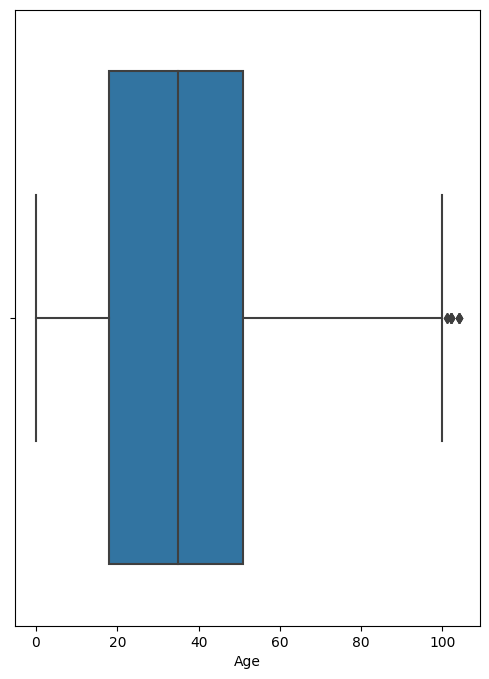

In [194]:
#get the boxplot for Age
plt.figure(figsize=(6,8))
sbn.boxplot(data=census12_df, x='Age')

### Fig 1: Age Boxplot

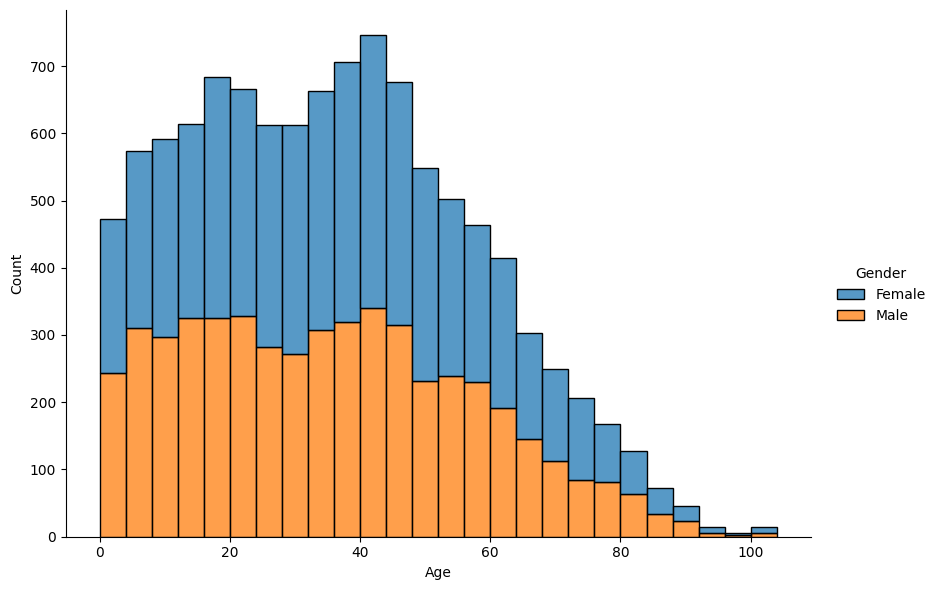

In [195]:
#to get age distribution with a bin width of 4
sbn.displot(data=census12_df, x='Age', kind='hist', height=6, aspect=1.4, binwidth=4,
            hue='Gender', multiple='stack')

### Fig 2: Histogram showing Population Distribution

Text(0.5, 1.0, '')

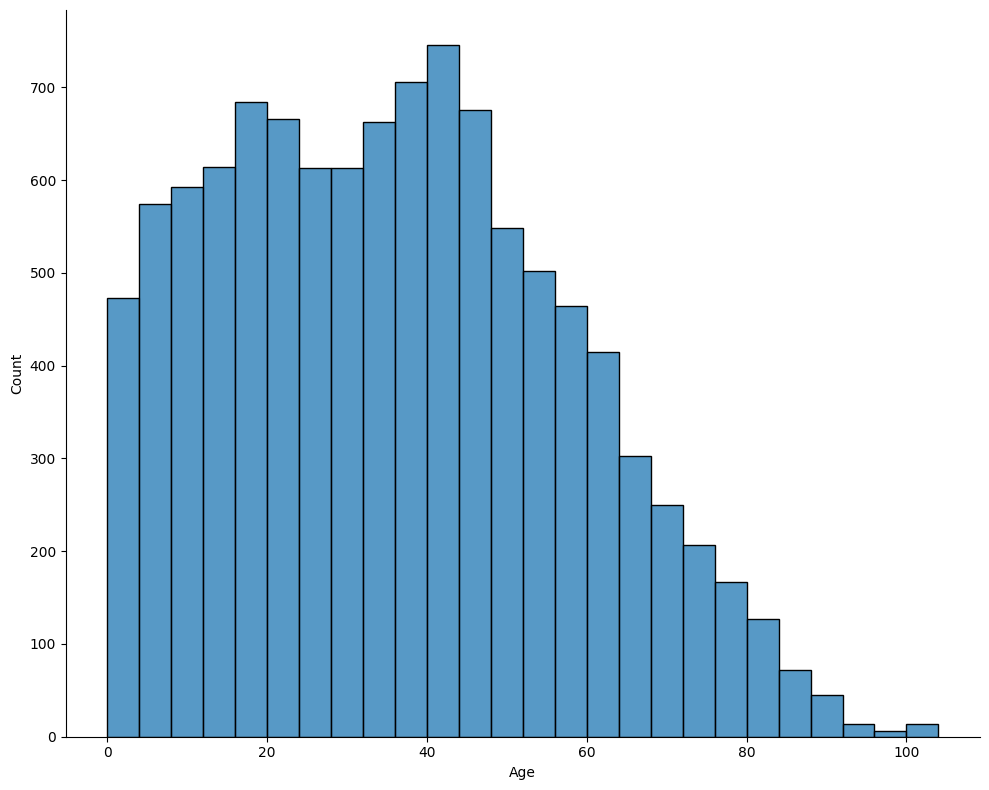

In [196]:
sbn.displot(x=census12_df['Age'], binwidth=4, height=8, aspect=10/8)
plt.title("")

### Fig 3: Age Histogram

In [197]:
female_census12_df = census12_df[census12_df['Gender'] == 'Female']
male_census12_df = census12_df[census12_df['Gender'] == 'Male']

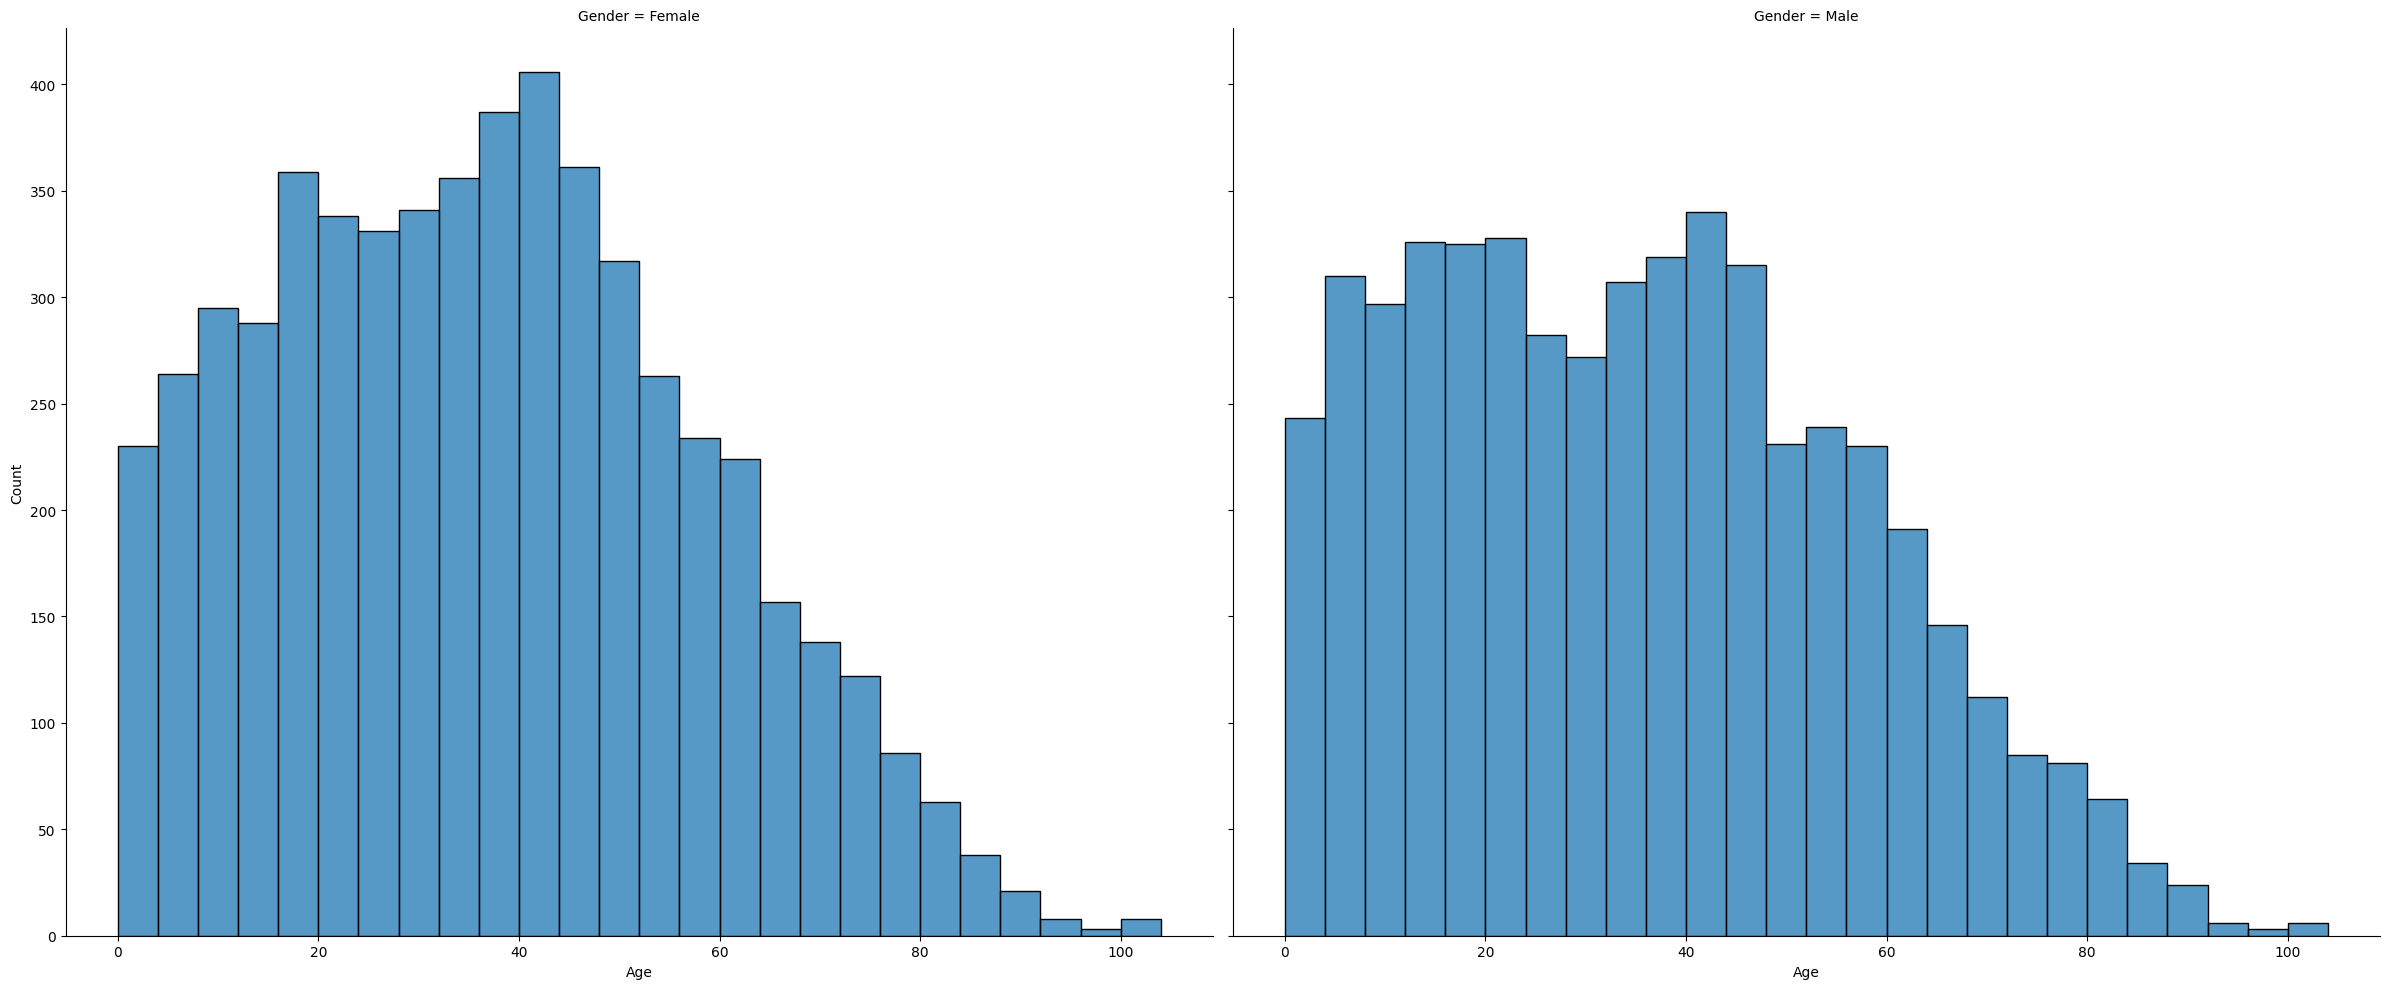

In [200]:
sbn.displot(data=census12_df, x='Age', binwidth=4, col='Gender', height=10.0, aspect=12.0/10.0)

### Fig 4: Female and Male Age Histogram

In [226]:
census12_df[(census12_df['Age'] >= 103) & (census12_df['Gender'] == 'Male')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_group
710,38,Barry Lodge,Russell,Clark,104,Head,Widowed,Male,Retired Housing manager/officer,None,Christian,100-104
6465,185,Gill Orchard,Christopher,Brown,104,Head,Divorced,Male,Retired Leisure centre manager,None,None,100-104


In [205]:
census12_df['Age'].quantile(q=0.25)

18.0

In [206]:
female_census12_ages = census12_df[census12_df['Gender'] == 'Female']['Age'].to_list()

In [207]:
male_census12_ages = census12_df[census12_df['Gender'] == 'Male']['Age'].to_list()

In [208]:
age_intervals = []
male_count = []
female_count = []
next_start = 0
for i in range(0,110,5):
    interval = f'{next_start}-{next_start+4}'
    next_start=next_start+4+1
    age_intervals.append(interval)
    male_count.append(0)
    female_count.append(0)

In [213]:
def get_age_group(age):
    index = int(age/5)
    return age_intervals[index]

In [214]:
census12_df['age_group'] = census12_df['Age'].apply(get_age_group)

In [215]:
for age in male_census12_ages:
    index = int(age/5)
    male_count[index] = male_count[index] + 1

In [217]:
for age in female_census12_ages:
    index = int(age/5)
    female_count[index] = female_count[index] + 1

In [218]:
census12_df[(census12_df['Gender'] == 'Male')  & (census12_df['Age'] >= 0) & (census12_df['Age'] <= 4)]['Age'].count()

324

In [219]:
census12_df[(census12_df['Gender'] == 'Female')]['Age'].count()

5638

In [220]:
age_intervals #with a class interval of 5

['0-4',
 '5-9',
 '10-14',
 '15-19',
 '20-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64',
 '65-69',
 '70-74',
 '75-79',
 '80-84',
 '85-89',
 '90-94',
 '95-99',
 '100-104',
 '105-109']

[Text(0.5, 0, 'Population Count'), Text(0, 0.5, 'Age Group')]

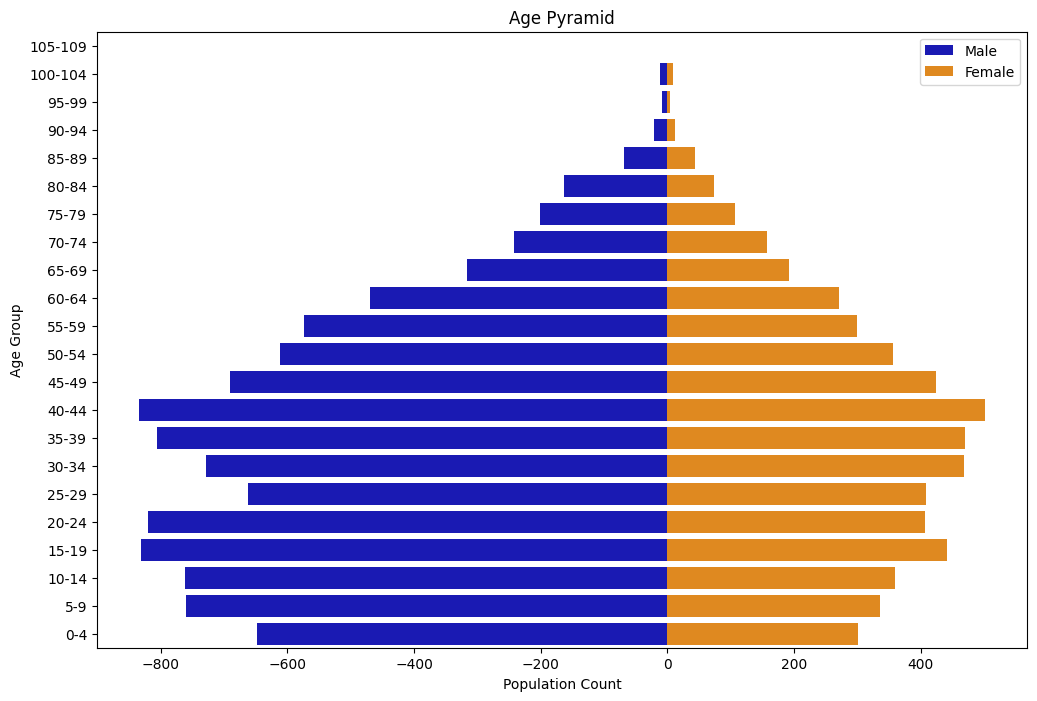

In [221]:
#to draw he age pyramid
age_pyramid_df = pd.DataFrame({
    'Age' : age_intervals[::-1],
    'Female' : female_count[::-1],
    'Male' : [-1 * val for val in male_count][::-1]
})

plt.figure(figsize=(12,8))
age_pyramid = sbn.barplot(x='Male', y='Age', data=age_pyramid_df,  color=('mediumblue'), label='Male')
age_pyramid = sbn.barplot(x='Female', y='Age', data=age_pyramid_df,  color=('darkorange'), label='Female')
age_pyramid.legend() 
plt.title('Age Pyramid')
age_pyramid.set(xlabel='Population Count', ylabel='Age Group')

### Fig 5: Female and Male Age Pyramid

In [222]:
census12_df['Religion'].value_counts()

None         3692
Christian    2297
Catholic     1112
Methodist     734
Muslim        149
Sikh           72
Jewish         40
Orthodoxy       4
Quaker          2
Bahai           2
Baptist         1
Hindu           1
Name: Religion, dtype: int64

     Religion  Count
0    Catholic  10.34
1   Methodist   6.83
2        None  34.33
3   Christian  21.36
4         NaN  24.62
5      Muslim   1.39
6        Sikh   0.67
7   Orthodoxy   0.04
8      Jewish   0.37
9      Quaker   0.02
10      Bahai   0.02
11    Baptist   0.01
12      Hindu   0.01


Text(0, 0.5, 'Religion')

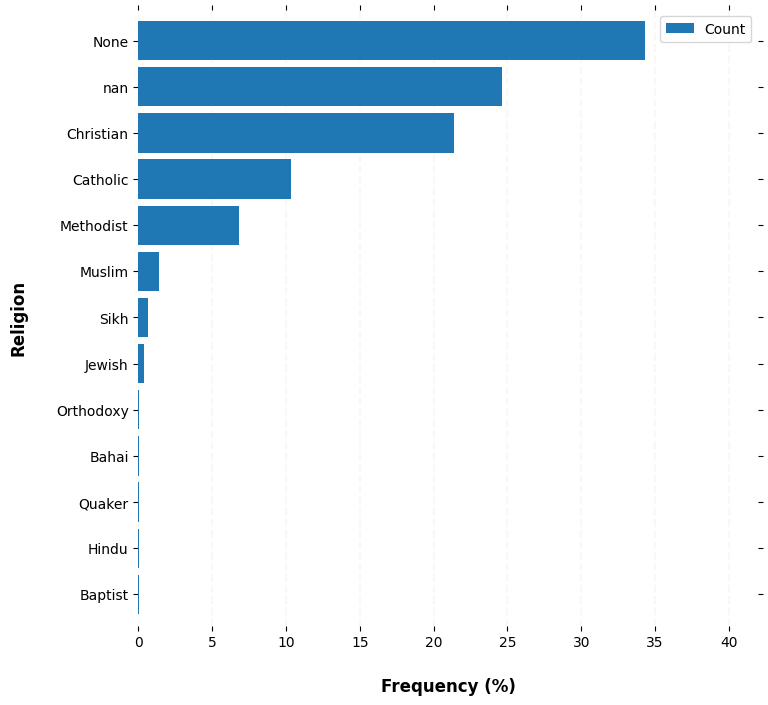

In [223]:
religions = census12_df['Religion'].unique().tolist()
religion_count = []
total_religion = len(census12_df['Religion'])
for religion in religions:
    rc = census12_df[census_df['Religion'] == religion]['Religion'].count()
    percentage = round((rc/total_religion)*100, 2)
    religion_count.append(percentage)
religion_count[religions.index(np.nan)] = round(((census12_df['Religion'].isna().sum())/total_religion)*100, 2)
df = pd.DataFrame({
    'Religion' : religions,
    'Count' : religion_count
})
print(df)
df = df.sort_values('Count')
ax = df.plot(kind='barh', x = 'Religion', y='Count', figsize=(8, 8), zorder=2, width=0.85)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off",
               labelleft="on")
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.set_xlabel("Frequency (%)", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Religion", labelpad=20, weight='bold', size=12)

### Fig 6. Bar chart showing the frequency of religions in percentage

  Marital Status  Count
4        Widowed   4.15
2       Divorced   8.81
3            NaN  22.52
1        Married  27.95
0         Single  36.57


Text(0, 0.5, 'Marital Status')

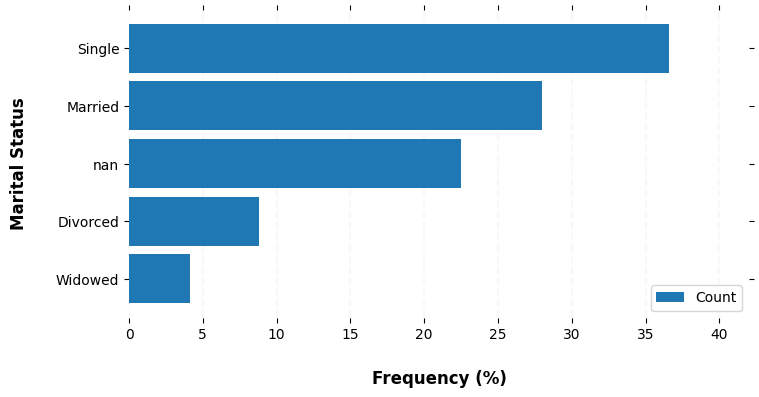

In [224]:
marital_statuses = census12_df['Marital Status'].unique().tolist()
marital_status_count = []
total_marital_status = len(census12_df['Marital Status'])
for marital_status in marital_statuses:
    rc = census12_df[census12_df['Marital Status'] == marital_status]['Marital Status'].count()
    percentage = round((rc/total_marital_status)*100, 2)
    marital_status_count.append(percentage)
marital_status_count[marital_statuses.index(np.nan)] = round(((census12_df['Marital Status'].isna().sum())/total_marital_status)*100, 2)
# del marital_status_count[marital_statuses.index(np.nan)]
# marital_statuses.remove(np.nan)
df = pd.DataFrame({
    'Marital Status' : marital_statuses,
    'Count' : marital_status_count
})
df = df.sort_values('Count')
ax = df.plot(kind='barh', x = 'Marital Status', y='Count', figsize=(8, 4), zorder=2, width=0.85,
            )
# ['#CC0000','#CC6600', '#CCCC00', '#336600']
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
print(df)
# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off",
               labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=0)

# Set x-axis label
ax.set_xlabel("Frequency (%)", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Marital Status", labelpad=20, weight='bold', size=12)

#### Fig 7. Bar chart showing the frequency of marital status in percentage

In [225]:
census12_df['Infirmity'].value_counts()

None                   10669
Physical Disability       23
Blind                     19
Deaf                      14
Mental Disability         11
Disabled                   9
Unknown Infection          9
Name: Infirmity, dtype: int64

Text(0, 0.5, 'Infirmity')

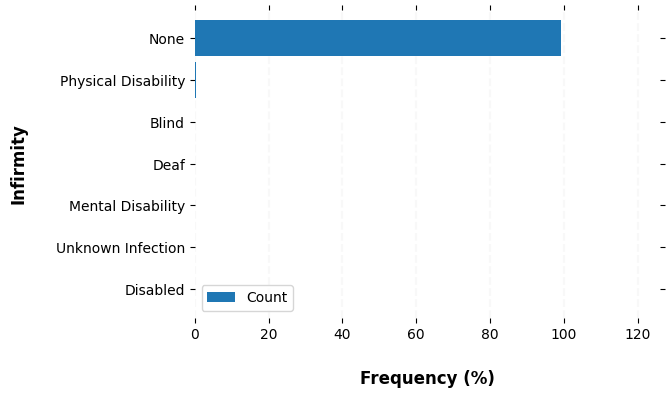

In [229]:
infirmities = census12_df['Infirmity'].unique().tolist()
infirmity_count = []
total_infirmity = len(census12_df['Infirmity'])
for infirmity in infirmities:
    rc = census12_df[census12_df['Infirmity'] == infirmity]['Infirmity'].count()
    percentage = round((rc/total_infirmity)*100, 2)
    infirmity_count.append(percentage)
df = pd.DataFrame({
    'Infirmity' : infirmities,
    'Count' : infirmity_count
})
df = df.sort_values('Count')
ax = df.plot(kind='barh', x = 'Infirmity', y='Count', figsize=(6, 4), zorder=2, width=0.85)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off",
               labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Frequency (%)", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Infirmity", labelpad=20, weight='bold', size=12)

In [230]:
def get_employment_category(occupation):
    if (occupation.lower() == 'child'):
        return 'Child'
    if ('retired' in occupation.lower()):
        return 'Retired'
    elif ('student' in occupation.lower()):
        return 'Student'
    elif ('unemployed' in occupation.lower()):
        return 'Unemployed'
    else:
        return 'Employed'

In [231]:
census12_df['employment_category'] = census12_df['Occupation'].apply(get_employment_category)

In [232]:
census12_df['employment_category'].value_counts()

Employed      5770
Student       2772
Retired        902
Unemployed     685
Child          625
Name: employment_category, dtype: int64

Text(0, 0.5, 'Frequency (%)')

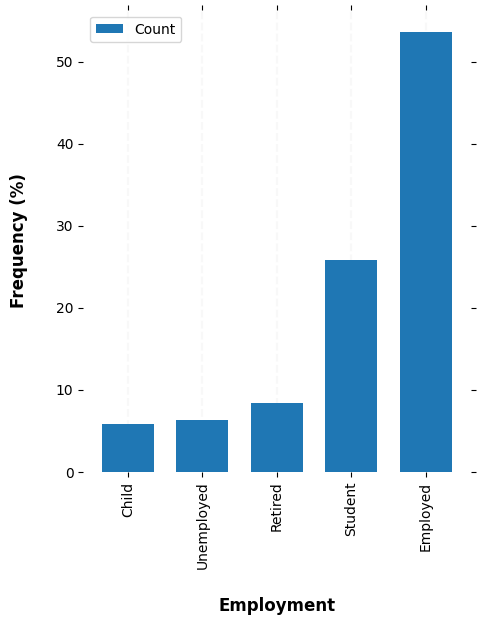

In [233]:
employments = census12_df['employment_category'].unique().tolist()
employment_count = []
total_employments = len(census12_df['employment_category'])
for employment in employments:
    rc = census12_df[census12_df['employment_category'] == employment]['employment_category'].count()
    percentage = round((rc/total_employments)*100, 2)
    employment_count.append(percentage)
df = pd.DataFrame({
    'Employment' : employments,
    'Count' : employment_count
})
df = df.sort_values('Count')
ax = df.plot(kind='bar', x = 'Employment', y='Count', figsize=(5, 6),  zorder=2, width=0.7)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off",
               labelleft="on")
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
ax.set_xlabel("Employment", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Frequency (%)", labelpad=20, weight='bold', size=12)

In [235]:
census12_df[(census12_df['employment_category'] == 'Unemployed')].groupby(['Gender'])['Gender'].count()

Gender
Female    435
Male      250
Name: Gender, dtype: int64

In [237]:
unemployed_population_df = census12_df[census12_df['employment_category'] == 'Unemployed']

   Age Group  Unemployment Count
0      40-44               16.64
1      35-39               13.87
2      60-64                7.74
3      45-49               12.99
4      25-29                9.64
5      55-59                9.05
6      50-54               10.22
7      30-34               11.39
8      20-24                5.11
9      65-69                3.21
10     15-19                0.15


Text(0, 0.5, 'Frequency (%)')

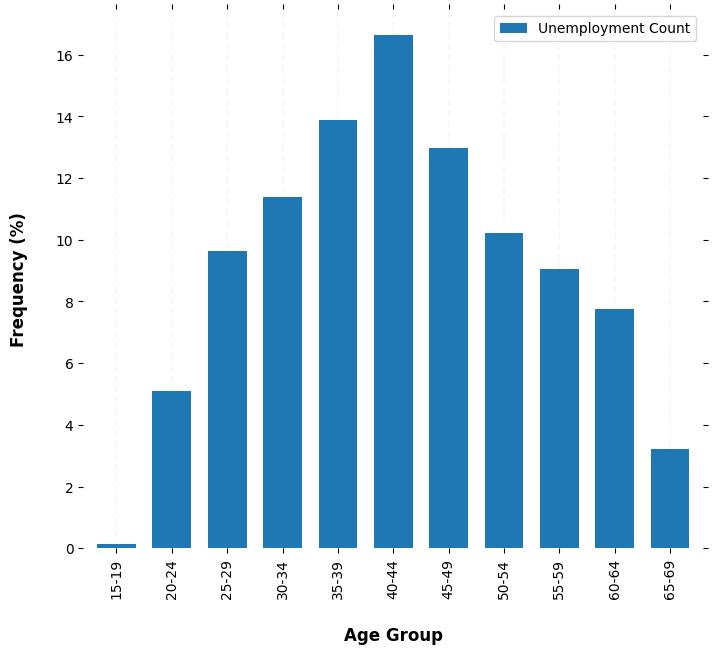

In [238]:
age_groups = unemployed_population_df['age_group'].unique().tolist()
age_group_count = []
total_age_group = len(unemployed_population_df['age_group'])
for age_group in age_groups:
    rc = unemployed_population_df[unemployed_population_df['age_group'] == age_group]['age_group'].count()
    percentage = round((rc/total_age_group)*100, 2)
    age_group_count.append(percentage)
df = pd.DataFrame({
    'Age Group' : age_groups,
    'Unemployment Count' : age_group_count
})
print(df)
df = df.sort_values('Age Group')
ax = df.plot(kind='bar', x = 'Age Group', y='Unemployment Count', figsize=(8, 7),
             zorder=2, width=0.7)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off",
               labelleft="on")
vals = ax.get_xticks()
for idx, tick in enumerate(vals):
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.set_xlabel("Age Group", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Frequency (%)", labelpad=20, weight='bold', size=12)

In [239]:
census12_df[census12_df['Marital Status'].isin(['Married', 'Divorced'])]['Marital Status'].value_counts()

Married     3006
Divorced     947
Name: Marital Status, dtype: int64

Text(0, 0.5, 'Marital Status')

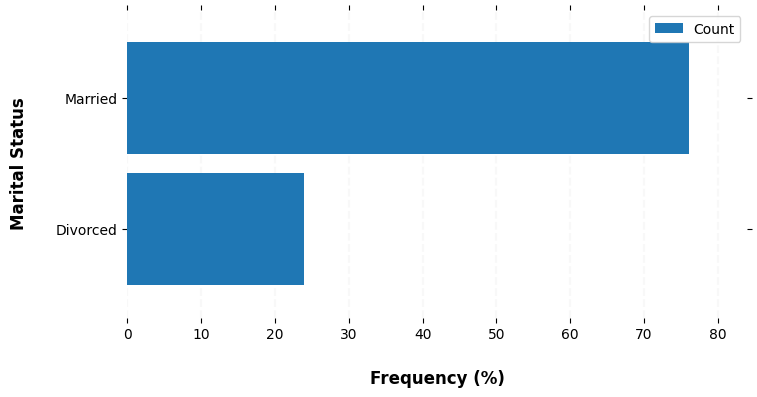

In [240]:
marital_statuses = ['Divorced', 'Married']
marital_status_count = []
total_marital_status = len(census12_df[census12_df['Marital Status'].isin(marital_statuses)])
for marital_status in marital_statuses:
    rc = census12_df[census12_df['Marital Status'] == marital_status]['Marital Status'].count()
    percentage = round((rc/total_marital_status)*100, 2)
    marital_status_count.append(percentage)

df = pd.DataFrame({
    'Marital Status' : marital_statuses,
    'Count' : marital_status_count
})
df = df.sort_values('Count')
ax = df.plot(kind='barh', x = 'Marital Status', y='Count', figsize=(8, 4), zorder=2, width=0.85)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off",
               labelleft="on")

vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
ax.set_xlabel("Frequency (%)", labelpad=20, weight='bold', size=12)

ax.set_ylabel("Marital Status", labelpad=20, weight='bold', size=12)

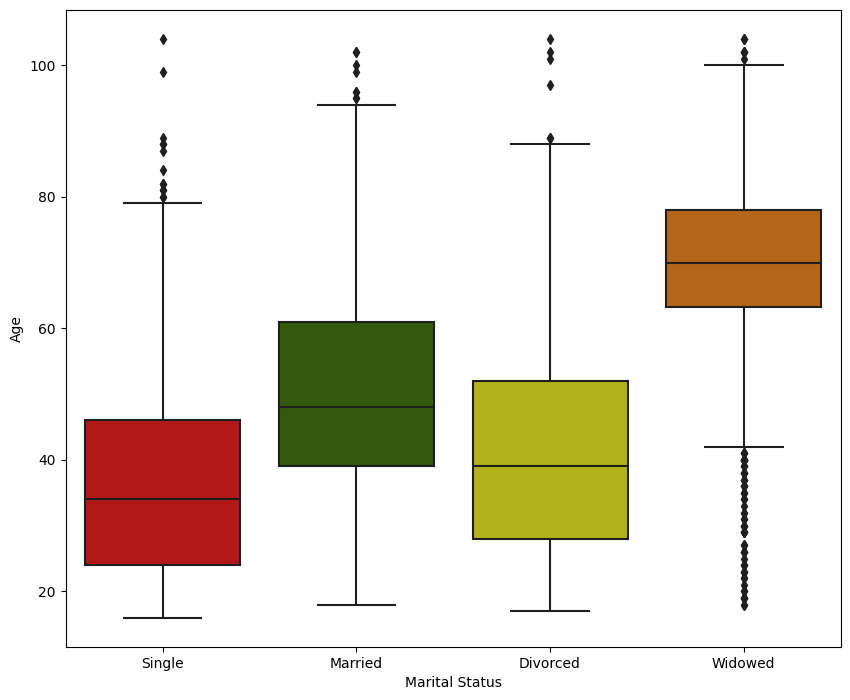

In [243]:
a4_dims = (10, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
bx = sbn.boxplot(data=census12_df, x='Marital Status', y='Age', palette=['#CC0000','#336600', '#CCCC00', '#CC6600'])

In [244]:
no_of_new_born = census12_df[census12_df['Age'] == 0]['Age'].count()

In [245]:
no_of_women_aged_25_to_29 = census12_df[(census12_df['Age'].between(25, 29)) & 
                                     (census12_df['Gender'] == 'Female')]['Age'].count()

In [246]:
no_of_women_aged_25_to_29

408

In [247]:
new_birth_ratio = no_of_new_born/no_of_women_aged_25_to_29

In [248]:
births_per_100000 = round(new_birth_ratio * 100000)

In [250]:
new_birth_ratio, births_per_100000

(0.23529411764705882, 23529)

In [252]:
no_of_children_aged_4 = no_of_new_born = census12_df[census12_df['Age'] == 4]['Age'].count()

In [253]:
no_of_women_aged_30_to_34 = census12_df[(census12_df['Age'].between(30, 34)) & 
                                     (census12_df['Gender'] == 'Female')]['Age'].count()

In [254]:
no_of_children_aged_4, no_of_women_aged_30_to_34

(152, 468)

In [255]:
past_year_birth_ratio = no_of_children_aged_4/no_of_women_aged_30_to_34

In [256]:
past_year_birth_ratio

0.3247863247863248

In [257]:
past_birth_per_100000 = round(past_year_birth_ratio * 100000)

In [258]:
past_year_birth_ratio, past_birth_per_100000

(0.3247863247863248, 32479)

In [259]:
current_birth_rate_per_annum = ((new_birth_ratio - past_year_birth_ratio)/past_year_birth_ratio)/5

In [260]:
current_birth_rate_per_annum

-0.055108359133126936

In [261]:
current_birth_rate_per_100000 = current_birth_rate_per_annum * 100000

In [262]:
round(current_birth_rate_per_100000)

-5511

## Death rate calculation
#### Let's use the age ranges  below to get the death rate. Getting an average of each of the comparison per line
- 56-60,   61-65
- 66-70,   71-75
- 76-80,   81-85
- 86-90,   91-95
- 96- 100, 101-105

In [263]:
i = 56
val1 = []
val2 = []
c = 1
while i < 106:
    if (c%2==1):
        val1.append((i,i+4))
    else:
        val2.append((i,i+4))
    i=i+4+1
    c+=1

In [264]:
val1, val2

([(56, 60), (66, 70), (76, 80), (86, 90), (96, 100)],
 [(61, 65), (71, 75), (81, 85), (91, 95), (101, 105)])

In [265]:
# let's Compute the death rate for each of the intervals drawn out above
rates_per_annum = []
for min_years, max_years in zip(val1, val2):
    count1 = census12_df[(census12_df['Age'].between(min_years[0], min_years[1]))]['Age'].count()
    count2 = census12_df[(census12_df['Age'].between(max_years[0], max_years[1]))]['Age'].count()
    rate_per_annum = ((count1 - count2)/count1)/5
    rates_per_annum.append(rate_per_annum)

In [266]:
rates_per_annum

[0.03093145869947276, 0.03865030674846626, 0.0592964824120603, 0.13125, -0.1]

#### Let's get average to get the death ate per annum

In [268]:
death_rate_per_annum = sum(rates_per_annum)/len(rates_per_annum)

In [269]:
death_rate_per_annum

0.03202564957199987

In [270]:
#Death rates per 100000
deaths_per_100000 = death_rate_per_annum * 100000

In [271]:
births_per_100000 - deaths_per_100000

20326.435042800014

#### Let's assume that Visitors and Lodgers that are Single are Immigrants

In [272]:
no_of_immigrants = len(census12_df[(census12_df['Relationship to Head of House'].isin(['Visitor', 'Lodger'])) & 
         (census12_df['Marital Status'] == 'Single')])

In [273]:
no_of_immigrants

333

In [274]:
immigration_rate = no_of_immigrants/len(census12_df)

In [275]:
immigration_rate

0.030965222242886368

In [276]:
immigration_rate_per_100000 = round(immigration_rate * 100000)

In [277]:
immigration_rate_per_100000

3097

#### Let's assume that emmigrants are divorcees that left town

In [278]:
no_of_emmigrants = len(census12_df[census12_df['Marital Status'] == 'Divorced'])

In [279]:
no_of_emmigrants

947

In [280]:
emmigration_rate = no_of_emmigrants/len(census12_df)

In [281]:
emmigration_rate

0.08806025664868886

In [282]:
emmigration_rate_per_100000 = round(emmigration_rate * 100000)

In [283]:
emmigration_rate_per_100000

8806

#### Calculating population growth with formular

*****Change in Population Size = (Births + Immigration) - (Deaths + Emigration)*****

In [285]:
population_growth_rate = (current_birth_rate_per_annum + immigration_rate) - (death_rate_per_annum + emmigration_rate)

In [286]:
population_growth_rate

-0.1442290431109293

In [287]:
population_growth_rate_per_100000 = population_growth_rate * 100000

In [288]:
population_growth_rate_per_100000 = (current_birth_rate_per_100000 + immigration_rate_per_100000) - (deaths_per_100000 + emmigration_rate_per_100000)

In [289]:
round(population_growth_rate_per_100000)

-14422

#### Is there a demand for housing?
- Assumption is to use the mode value per street as expected number of occupants. If the number of occupants is less than the mode, then the house is underused. If number of occupants is greater then the mode value, the house is overused

In [290]:
from statistics import mode
streets = census12_df['Street'].unique().tolist()
occupants_number = []
total_undersized_house = 0
total_oversized_house = 0
for street in streets:
    house_numbers = census12_df[census_df['Street'] == street]['House Number'].unique().tolist()
    people_count_per_house = []
    for house_number in house_numbers:
        people_count = len(census12_df[(census12_df['Street'] == street) 
                                 & (census12_df['House Number'] == house_number)])
        people_count_per_house.append(people_count)
    mode_count_for_street = mode(people_count_per_house)
    occupants_number_gt_mode = len([val for val in people_count_per_house if val > mode_count_for_street])
    total_oversized_house += occupants_number_gt_mode
    occupants_number_lt_mode = len([val for val in people_count_per_house if val < mode_count_for_street])
    total_undersized_house += occupants_number_lt_mode
print("Number of undersized Houses : ", total_undersized_house)
print("Number of oversized Houses : ", total_oversized_house)

Number of undersized Houses :  534
Number of oversized Houses :  1268


## Non-fake Religion
- Let's get the Mean, Median, Mode, Range and Interquartile range of non fake religions

In [291]:
non_fake_religious_df = census12_df[census12_df['Religion'].isin(['Catholic', 'Christian', 'Hindu','Quaker'
                                                'Jewish', 'Methodist', 'Muslim', 'Orthodoxy','Sikh' ])]

In [294]:
non_fake_religious_df.groupby('Religion')['Age'].mean()

Religion
Catholic     42.591727
Christian    49.800609
Hindu        34.000000
Methodist    45.027248
Muslim       36.140940
Orthodoxy    54.750000
Sikh         35.013889
Name: Age, dtype: float64

In [295]:
non_fake_religious_df.groupby('Religion')['Age'].median()

Religion
Catholic     42.0
Christian    51.0
Hindu        34.0
Methodist    43.0
Muslim       31.0
Orthodoxy    52.5
Sikh         33.0
Name: Age, dtype: float64

In [296]:
religions = non_fake_religious_df['Religion'].unique().tolist()
religion_mode_dict = {}
for religion in religions:
    mode_age = mode(non_fake_religious_df[non_fake_religious_df['Religion'] == religion]['Age'].tolist())
    religion_mode_dict[religion] = mode_age

In [297]:
religion_mode_dict

{'Catholic': 41,
 'Methodist': 38,
 'Christian': 51,
 'Muslim': 21,
 'Sikh': 34,
 'Orthodoxy': 67,
 'Hindu': 34}

In [298]:
Max = non_fake_religious_df.groupby(['Religion'])['Age'].max()

In [299]:
Min = non_fake_religious_df.groupby(['Religion'])['Age'].min()

In [300]:
Max - Min

Religion
Catholic     84
Christian    86
Hindu         0
Methodist    84
Muslim       85
Orthodoxy    20
Sikh         65
Name: Age, dtype: int32

In [301]:
Q3 = non_fake_religious_df.groupby(['Religion'])['Age'].quantile(0.75)

In [302]:
Q1 = non_fake_religious_df.groupby(['Religion'])['Age'].quantile(0.25)

In [303]:
Q3 - Q1

Religion
Catholic     17.00
Christian    27.00
Hindu         0.00
Methodist    24.00
Muslim       17.00
Orthodoxy     7.25
Sikh         17.50
Name: Age, dtype: float64

## Let's get the Non-fake religions boxplot with respect to Age

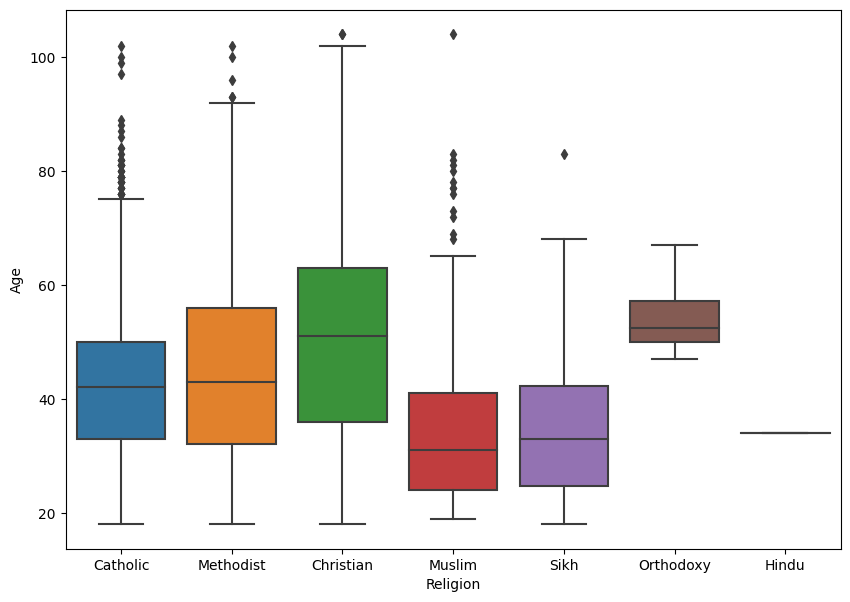

In [304]:
a4_dims = (10, 7)
fig, ax = plt.subplots(figsize=a4_dims)
bx = sbn.boxplot(y = 'Age', orient='v', x = 'Religion', data = non_fake_religious_df)
religion_vals = non_fake_religious_df['Religion'].unique().tolist()

## Fake Religion
- Let's get the Mean, Median, Mode, Range and Interquartile range of non fake religion

In [305]:
fake_religious_df = census12_df[census12_df['Religion'] == 'None']

In [307]:
fake_religious_df.groupby('Religion')['Age'].mean()


Religion
None    41.759751
Name: Age, dtype: float64

In [308]:
fake_religious_df.groupby('Religion')['Age'].median()


Religion
None    39.0
Name: Age, dtype: float64

In [309]:
religions = fake_religious_df['Religion'].unique().tolist()
religion_mode_dict = {}
for religion in religions:
    mode_age = mode(fake_religious_df[fake_religious_df['Religion'] == religion]['Age'].tolist())
    religion_mode_dict[religion] = mode_age

In [310]:
religion_mode_dict

{'None': 19}

In [311]:
Max = fake_religious_df.groupby(['Religion'])['Age'].max()

In [312]:
Min = fake_religious_df.groupby(['Religion'])['Age'].min()

In [313]:
Max - Min

Religion
None    86
Name: Age, dtype: int32

In [314]:
Q3 = fake_religious_df.groupby(['Religion'])['Age'].quantile(0.75)

In [315]:
Q1 = fake_religious_df.groupby(['Religion'])['Age'].quantile(0.25)

In [316]:
Q3 - Q1

Religion
None    23.0
Name: Age, dtype: float64

## Boxplot for people with no religion

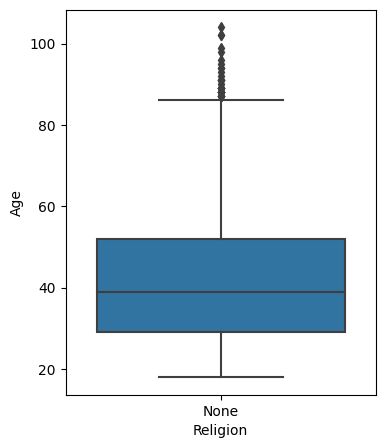

In [317]:
a4_dims = (4, 5)
fig, ax = plt.subplots(figsize=a4_dims)
bx = sbn.boxplot(y = 'Age', orient='v', x = 'Religion', data = fake_religious_df)
religion_vals = fake_religious_df['Religion'].unique().tolist()

#### For Prediction over 10 years ,let's use the formular 

***future_prediction = current_population_per_100000 * ((1+rate_per_annum)^10)***

In [318]:
number_to_be_born_in_ten_years_per_100000 = round(births_per_100000*((1+current_birth_rate_per_annum)**10))

In [319]:
number_to_be_born_in_ten_years_per_100000

13348

In [320]:
expected_death_in_ten_years_per_100000 = round(deaths_per_100000 * ((1+death_rate_per_annum)**10))

In [321]:
expected_death_in_ten_years_per_100000

4389

#### Let's get the population of people that are liable to die as we assume from age 60 upwards

In [324]:
no_of_population_from_60_upward = len(census12_df[census_df['Age'] >= 60])

In [325]:
population_from_60_df = census12_df[census_df['Age'] >= 60]

In [326]:
count_per_religion_for_death = population_from_60_df.groupby('Religion').count()['Age']

In [327]:
del (count_per_religion_for_death['None'])

In [328]:
count_per_religion_for_death

Religion
Catholic     147
Christian    719
Jewish        10
Methodist    157
Muslim        18
Orthodoxy      1
Sikh           4
Name: Age, dtype: int64

In [329]:
religions_death_rate_per_annum = (count_per_religion_for_death/no_of_population_from_60_upward) * death_rate_per_annum

In [330]:
religions_death_rate_per_annum

Religion
Catholic     0.002906
Christian    0.014214
Jewish       0.000198
Methodist    0.003104
Muslim       0.000356
Orthodoxy    0.000020
Sikh         0.000079
Name: Age, dtype: float64

In [331]:
population_in_next_ten_years = round(100000*((1+population_growth_rate)**10))

In [332]:
population_in_next_ten_years

21066

In [333]:
religion_expected_death_in_ten_years = (round(population_in_next_ten_years * 
                                              religions_death_rate_per_annum)).astype('int32')

In [334]:
religion_expected_death_in_ten_years

Religion
Catholic      61
Christian    299
Jewish         4
Methodist     65
Muslim         7
Orthodoxy      0
Sikh           2
Name: Age, dtype: int32

#### Let's determine how many will be of a particular religion for those who are age 16 and above

In [335]:
no_of_population_from_16 = len(census12_df[census12_df['Age'] >= 16])

In [336]:
population_from_16_df = census12_df[census12_df['Age'] >= 16]

In [338]:
count_per_religion_from_16 = population_from_16_df.groupby('Religion').count()['Age']

In [339]:
del (count_per_religion_from_16['None'])

In [340]:
religions_from_16_rate_per_annum = (count_per_religion_from_16/len(census12_df))

In [341]:
religions_from_16_rate_per_annum

Religion
Bahai        0.000186
Baptist      0.000093
Catholic     0.103403
Christian    0.213595
Hindu        0.000093
Jewish       0.003720
Methodist    0.068254
Muslim       0.013855
Orthodoxy    0.000372
Quaker       0.000186
Sikh         0.006695
Name: Age, dtype: float64

In [342]:
religions_from_16_for_next_10_years_per_100000 = population_in_next_ten_years * religions_from_16_rate_per_annum

In [343]:
round(religions_from_16_for_next_10_years_per_100000)

Religion
Bahai           4.0
Baptist         2.0
Catholic     2178.0
Christian    4500.0
Hindu           2.0
Jewish         78.0
Methodist    1438.0
Muslim        292.0
Orthodoxy       8.0
Quaker          4.0
Sikh          141.0
Name: Age, dtype: float64

In [349]:
no_of_population_from_80 = len(census12_df[census12_df['Age'] >= 80])

In [350]:
fraction_of_over_80 = no_of_population_from_80 / len(census12_df)

In [351]:
fraction_of_over_80

0.025850846196763994

In [352]:
population_of_over_80_per_100000 = fraction_of_over_80 * 100000

In [353]:
round(population_of_over_80_per_100000)

2585

In [354]:
no_from_80_next_10_years = (len(census12_df[census12_df['Age'] >= 70])/len(census12_df))* population_in_next_ten_years

In [355]:
fraction_of_over_80_next_10_years = no_from_80_next_10_years/population_in_next_ten_years

In [356]:
fraction_of_over_80_next_10_years

0.07104333271340896

In [357]:
population_of_over_80_next_10_years_per_100000 = fraction_of_over_80_next_10_years * 100000

In [358]:
round(population_of_over_80_next_10_years_per_100000)

7104